In [19]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt

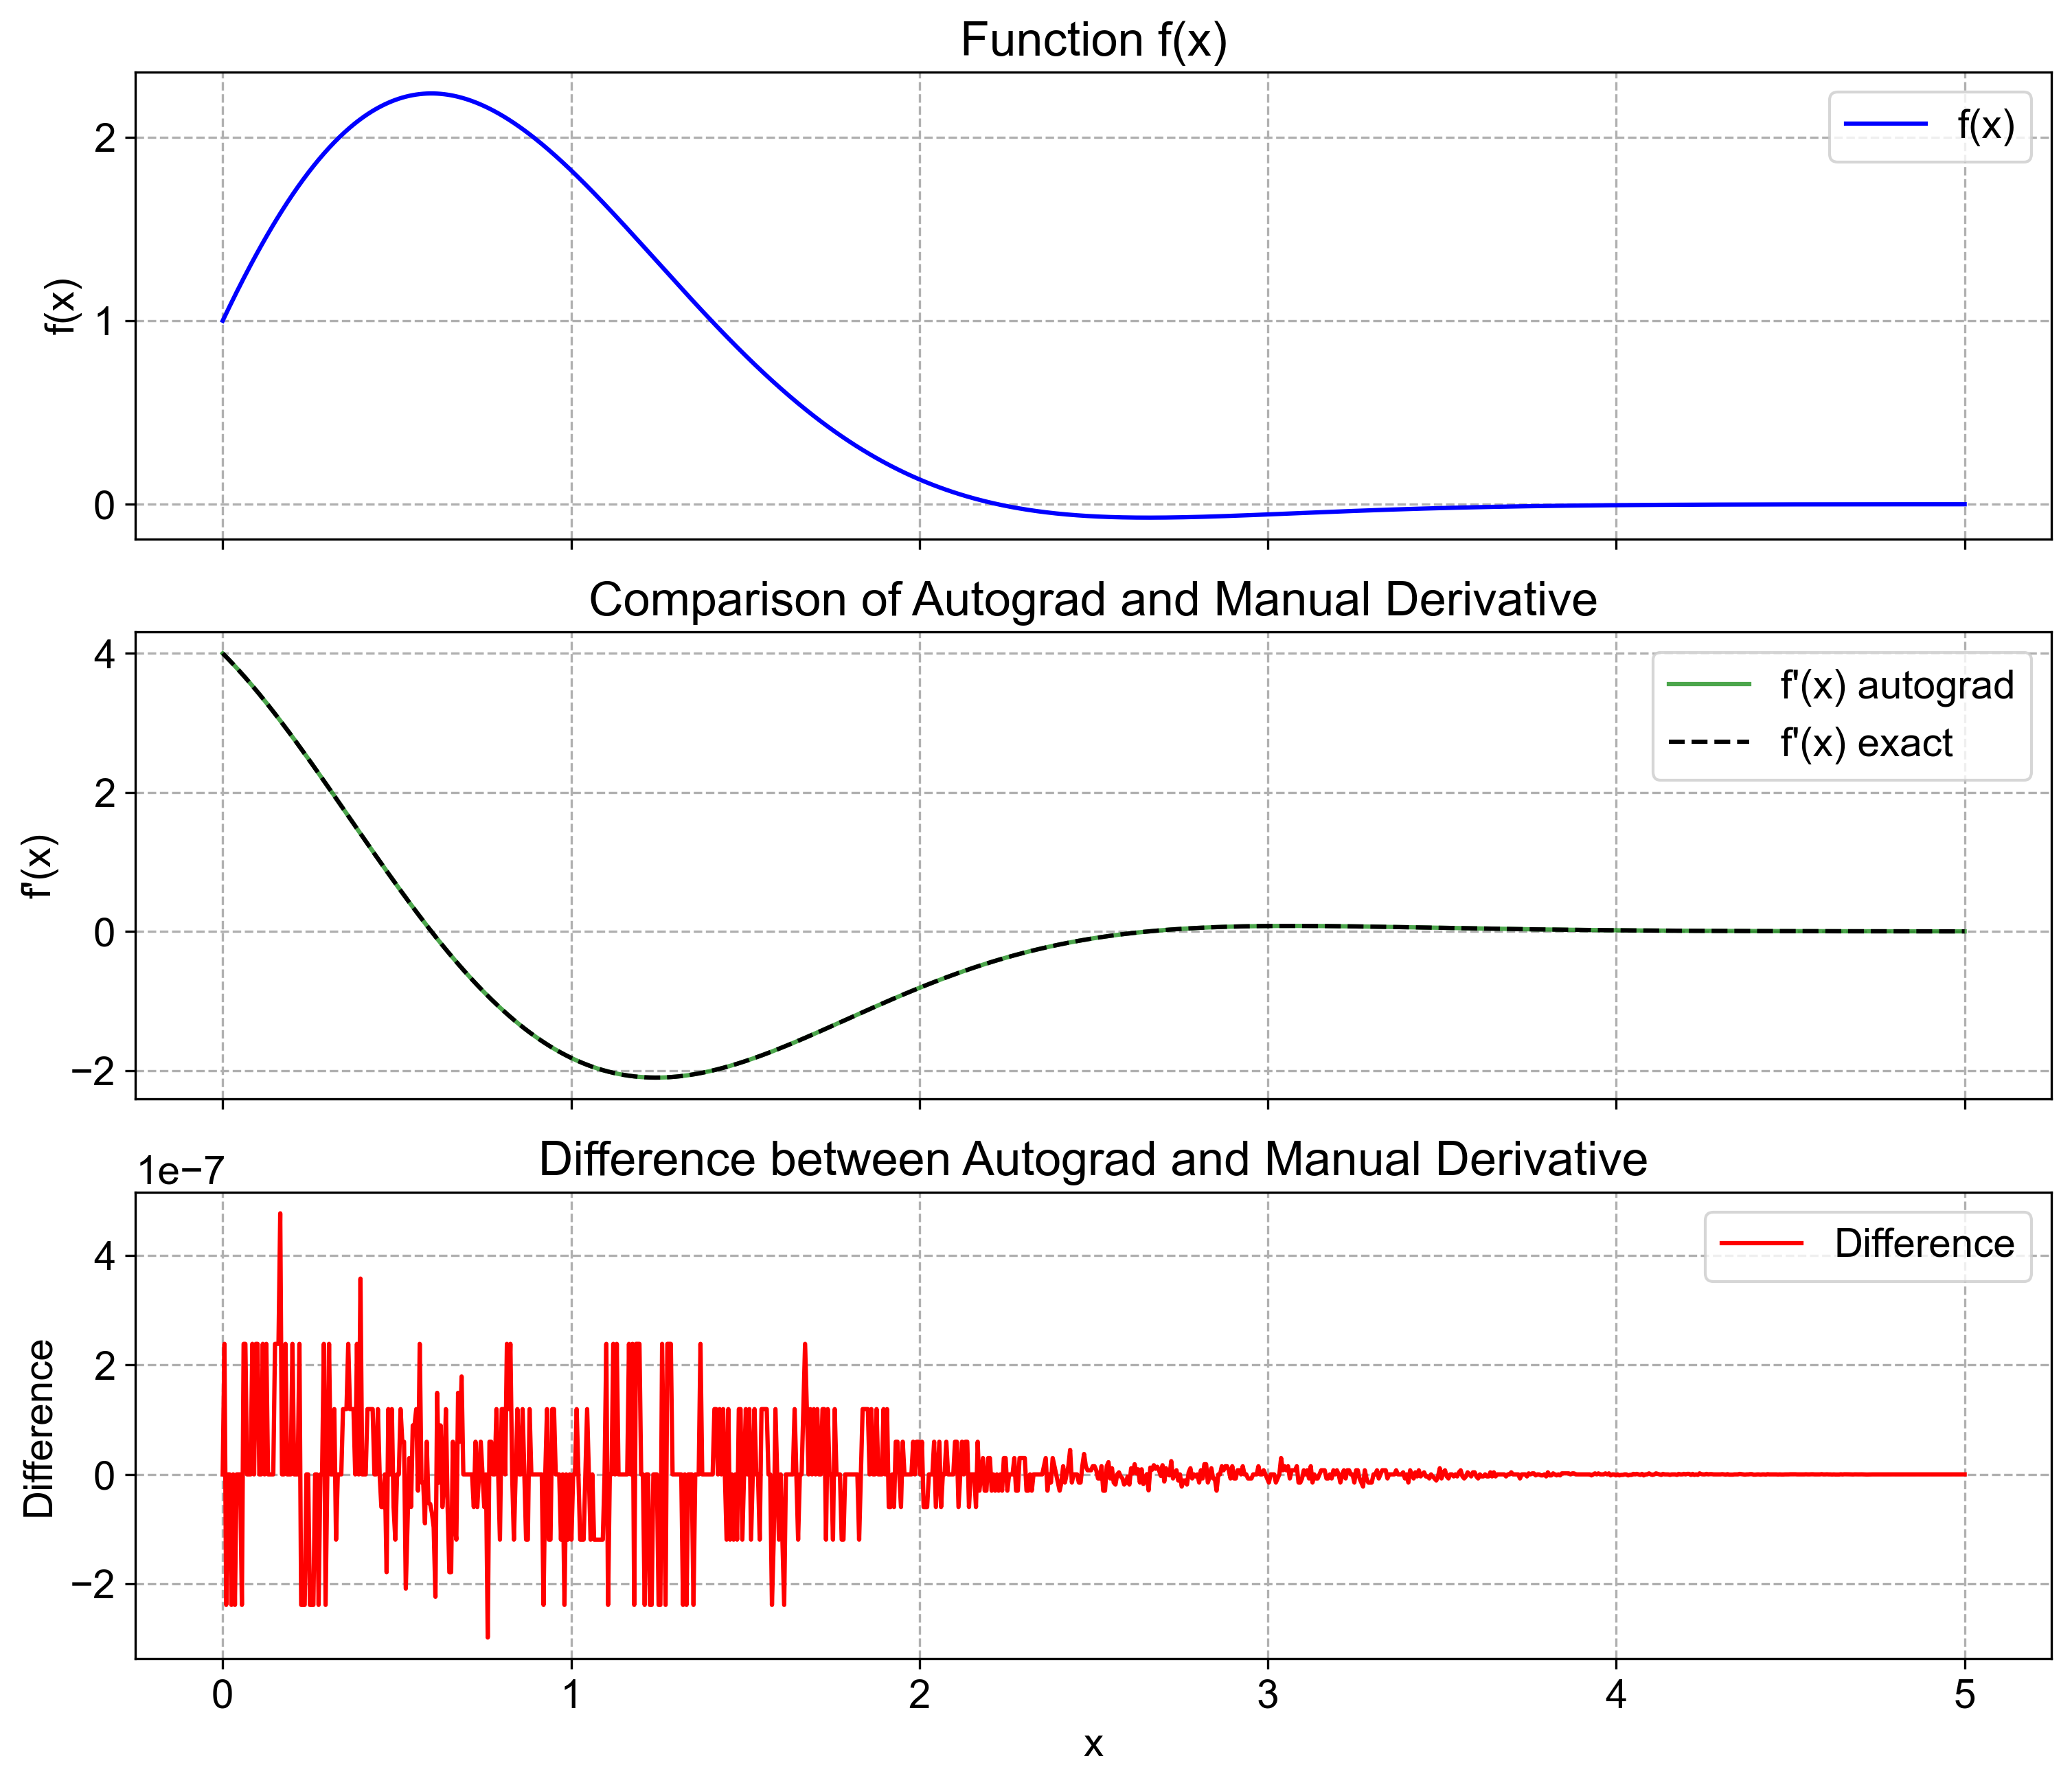

In [ ]:
def f(x):
    return (-2*x**2 + 4*x + 1) * th.exp(-0.5*x**2)

def dfdx(x):
    return (-4*x + 4 - x*(-2*x**2 + 4*x + 1)) * th.exp(-0.5*x**2)

x = th.linspace(0, 5, 1000, requires_grad=True)

y = f(x)

dydx = th.autograd.grad(
    y, 
    x, 
    grad_outputs=th.ones_like(y), 
    create_graph=True
)[0]
dydx_manual = dfdx(x)

plt.rcParams.update({'font.size': 14, 'font.family': 'Arial'})
fig, ax = plt.subplots(3,1,figsize=(12, 10),dpi=300,sharex=True)
ax[0].plot(x.detach().numpy(), y.detach().numpy(), label='f(x)', color='blue')
ax[1].plot(x.detach().numpy(), dydx.detach().numpy(), label="f'(x) autograd", color='green',alpha=0.7)
ax[1].plot(x.detach().numpy(), dydx_manual.detach().numpy(), label="f'(x) exact", linestyle='--', color='black')
ax[0].set_title("Function f(x)")
ax[1].set_title("Comparison of Autograd and Manual Derivative")
ax[0].legend()
ax[0].grid(ls='--')
ax[1].legend()
ax[1].grid(ls='--')
ax[0].set_ylabel("f(x)")
ax[1].set_ylabel("f'(x)")

ax[2].plot(x.detach().numpy(), (dydx - dydx_manual).detach().numpy(), label="Difference", color='red')
ax[2].set_title("Difference between Autograd and Manual Derivative")
ax[2].legend()
ax[2].grid(ls='--')
ax[2].set_xlabel("x")
ax[2].set_ylabel("Difference")
plt.show()

In [ ]:
import torch as th
from torch.autograd.functional import jacobian


def f(x):
    return th.stack([x[0]**2 + x[1], x[1]*x[2]])


x = th.tensor([1.0, 2.0, 3.0], requires_grad=True)  # n=3

J = jacobian(f, x)
print("Jacobian shape:", J.shape)  # (2,3)
print(J)

Jacobian shape: torch.Size([2, 3])
tensor([[2., 1., 0.],
        [0., 3., 2.]])
